In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
!ls drive/MyDrive/Machine_Learning_2025_2/trabajo_final

combined_keyboard_data.csv   merged_keyboard_data_20260110_142312.csv
data-evaluation.ipynb	     modelo.ipynb
keyboard-data-christian.csv  processed_keyboard_data.csv


In [33]:
import pandas as pd

output_file_balanced = 'drive/MyDrive/Machine_Learning_2025_2/trabajo_final/df_balanced_keyboard_data.csv'

df_processed = pd.read_csv(output_file_balanced)
display(df_processed.head())

,total_keystrokes,avg_inter_key_time_ms,total_clicks,avg_inter_click_time_ms,scroll_events,avg_scroll_magnitude,active_application,application_category
0,4.828314,5.157905,0.0,NaN,0.0,NaN,Slack,Comunicación
1,4.844187,5.265450,0.0,NaN,0.0,NaN,Slack,Comunicación
2,4.753590,5.444580,0.0,NaN,0.0,NaN,Slack,Comunicación
3,5.288267,5.390593,0.0,NaN,0.0,NaN,Slack,Comunicación
4,4.744932,5.238744,0.0,NaN,0.0,NaN,Slack,Comunicación


In [34]:
# ============================================
# PREPARACIÓN DE DATOS PARA CLASIFICACIÓN
# ============================================

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Verificar columnas del dataset
print("Columnas disponibles:")
print(df_processed.columns.tolist())
print(f"\nShape del dataset: {df_processed.shape}")
print(f"\nValores nulos por columna:")
print(df_processed.isnull().sum())

Columnas disponibles:
['total_keystrokes', 'avg_inter_key_time_ms', 'total_clicks', 'avg_inter_click_time_ms', 'scroll_events', 'avg_scroll_magnitude', 'active_application', 'application_category']

Shape del dataset: (27750, 8)

Valores nulos por columna:
total_keystrokes               0
avg_inter_key_time_ms          0
total_clicks                   0
avg_inter_click_time_ms    12670
scroll_events                  0
avg_scroll_magnitude       12670
active_application             0
application_category           0
dtype: int64


In [35]:
# ============================================
# PREPROCESAMIENTO Y SEPARACIÓN DE DATOS
# ============================================

# Manejo de valores nulos - rellenar con 0 (ausencia de actividad)
df_clean = df_processed.fillna(0)

# Separar features (X) y target (y)
# Asumiendo que 'application_category' es la variable a predecir
target_column = 'application_category'

# Verificar clases únicas
print(f"Clases en {target_column}:")
print(df_clean[target_column].value_counts())
print(f"\nNúmero de clases: {df_clean[target_column].nunique()}")

# Preparar features (solo columnas numéricas)
feature_columns = ['total_keystrokes', 'avg_inter_key_time_ms', 'total_clicks',
                   'avg_inter_click_time_ms', 'scroll_events', 'avg_scroll_magnitude']

X = df_clean[feature_columns]
y = df_clean[target_column]

# Codificar la variable objetivo (categorías a números)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

print(f"\nMapeo de clases:")
for i, clase in enumerate(le.classes_):
    print(f"{i}: {clase}")

# Dividir en train (70%) y test (30%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded
)

print(f"\nTamaño train: {X_train.shape}")
print(f"Tamaño test: {X_test.shape}")

# Escalar features (importante para Naive Bayes y Regresión Logística)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Clases en application_category:
application_category
Comunicación           7317
Navegadores            6446
Otros                  5565
Desarrollo/Terminal    4281
IDE/Desarrollo         4141
Name: count, dtype: int64

Número de clases: 5

Mapeo de clases:
0: Comunicación
1: Desarrollo/Terminal
2: IDE/Desarrollo
3: Navegadores
4: Otros

Tamaño train: (19425, 6)
Tamaño test: (8325, 6)


In [36]:
# ============================================
# MODELO 1: ÁRBOL DE DECISIÓN (Decision Tree)
# ============================================
print("=" * 60)
print("MODELO 1: ÁRBOL DE DECISIÓN")
print("=" * 60)

# Entrenar el modelo (sin escalar - los árboles no lo necesitan)
dt_model = DecisionTreeClassifier(
    criterion='entropy',  # Usa entropía (como en la clase 11)
    max_depth=10,         # Profundidad máxima para evitar overfitting
    min_samples_split=20, # Mínimo de muestras para dividir un nodo
    random_state=42
)

dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Métricas
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')

print(f"\nAccuracy (Exactitud): {accuracy_dt:.4f}")
print(f"Precision: {precision_dt:.4f}")
print(f"Recall (Sensibilidad): {recall_dt:.4f}")
print(f"F1-Score: {f1_dt:.4f}")

# Matriz de confusión
print("\nMatriz de Confusión:")
cm_dt = confusion_matrix(y_test, y_pred_dt)
print(cm_dt)

# Reporte de clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_dt, target_names=le.classes_))

MODELO 1: ÁRBOL DE DECISIÓN

Accuracy (Exactitud): 0.4072
Precision: 0.4261
Recall (Sensibilidad): 0.4072
F1-Score: 0.3883

Matriz de Confusión:
[[1441   80   56  461  157]
 [ 669  293  114   96  112]
 [ 411  143  290  317   81]
 [ 574  105  168  970  117]
 [ 937   38   56  243  396]]

Reporte de Clasificación:
                     precision    recall  f1-score   support

       Comunicación       0.36      0.66      0.46      2195
Desarrollo/Terminal       0.44      0.23      0.30      1284
     IDE/Desarrollo       0.42      0.23      0.30      1242
        Navegadores       0.46      0.50      0.48      1934
              Otros       0.46      0.24      0.31      1670

           accuracy                           0.41      8325
          macro avg       0.43      0.37      0.37      8325
       weighted avg       0.43      0.41      0.39      8325



In [37]:
# ============================================
# MODELO 2: NAIVE BAYES
# ============================================
print("\n" * 2)
print("=" * 60)
print("MODELO 2: NAIVE BAYES")
print("=" * 60)

# Entrenar el modelo (usa datos escalados)
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)
y_pred_nb = nb_model.predict(X_test_scaled)

# Métricas
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb, average='weighted')
recall_nb = recall_score(y_test, y_pred_nb, average='weighted')
f1_nb = f1_score(y_test, y_pred_nb, average='weighted')

print(f"\nAccuracy (Exactitud): {accuracy_nb:.4f}")
print(f"Precision: {precision_nb:.4f}")
print(f"Recall (Sensibilidad): {recall_nb:.4f}")
print(f"F1-Score: {f1_nb:.4f}")

# Matriz de confusión
print("\nMatriz de Confusión:")
cm_nb = confusion_matrix(y_test, y_pred_nb)
print(cm_nb)

# Reporte de clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_nb, target_names=le.classes_))




MODELO 2: NAIVE BAYES

Accuracy (Exactitud): 0.2837
Precision: 0.3132
Recall (Sensibilidad): 0.2837
F1-Score: 0.1765

Matriz de Confusión:
[[   4 1440    4  747    0]
 [   0 1058   12  211    3]
 [   3  700   38  501    0]
 [   1  645   26 1262    0]
 [   0 1241   22  407    0]]

Reporte de Clasificación:
                     precision    recall  f1-score   support

       Comunicación       0.50      0.00      0.00      2195
Desarrollo/Terminal       0.21      0.82      0.33      1284
     IDE/Desarrollo       0.37      0.03      0.06      1242
        Navegadores       0.40      0.65      0.50      1934
              Otros       0.00      0.00      0.00      1670

           accuracy                           0.28      8325
          macro avg       0.30      0.30      0.18      8325
       weighted avg       0.31      0.28      0.18      8325



In [38]:
# ============================================
# MODELO 3: REGRESIÓN LOGÍSTICA
# ============================================
print("\n" * 2)
print("=" * 60)
print("MODELO 3: REGRESIÓN LOGÍSTICA")
print("=" * 60)

# Entrenar el modelo (usa datos escalados)
lr_model = LogisticRegression(
    max_iter=1000,        # Iteraciones máximas para convergencia
    multi_class='multinomial',  # Para multiclase
    solver='lbfgs',       # Solver recomendado para multiclase
    random_state=42
)

lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

# Métricas
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr, average='weighted')
recall_lr = recall_score(y_test, y_pred_lr, average='weighted')
f1_lr = f1_score(y_test, y_pred_lr, average='weighted')

print(f"\nAccuracy (Exactitud): {accuracy_lr:.4f}")
print(f"Precision: {precision_lr:.4f}")
print(f"Recall (Sensibilidad): {recall_lr:.4f}")
print(f"F1-Score: {f1_lr:.4f}")

# Matriz de confusión
print("\nMatriz de Confusión:")
cm_lr = confusion_matrix(y_test, y_pred_lr)
print(cm_lr)

# Reporte de clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_lr, target_names=le.classes_))




MODELO 3: REGRESIÓN LOGÍSTICA

Accuracy (Exactitud): 0.3515
Precision: 0.3583
Recall (Sensibilidad): 0.3515
F1-Score: 0.3249

Matriz de Confusión:
[[1086  108   24  671  306]
 [ 641  220   62  174  187]
 [ 463  169  133  393   84]
 [ 503  106   72 1134  119]
 [ 919    8   45  345  353]]

Reporte de Clasificación:
                     precision    recall  f1-score   support

       Comunicación       0.30      0.49      0.37      2195
Desarrollo/Terminal       0.36      0.17      0.23      1284
     IDE/Desarrollo       0.40      0.11      0.17      1242
        Navegadores       0.42      0.59      0.49      1934
              Otros       0.34      0.21      0.26      1670

           accuracy                           0.35      8325
          macro avg       0.36      0.31      0.30      8325
       weighted avg       0.36      0.35      0.32      8325






COMPARACIÓN DE MODELOS


             Modelo  Accuracy  Precision   Recall  F1-Score
  Árbol de Decisión  0.407207   0.426081 0.407207  0.388279
        Naive Bayes  0.283724   0.313236 0.283724  0.176479
Regresión Logística  0.351471   0.358328 0.351471  0.324950



✅ MEJOR MODELO: Árbol de Decisión
   Accuracy: 0.4072 (40.72%)




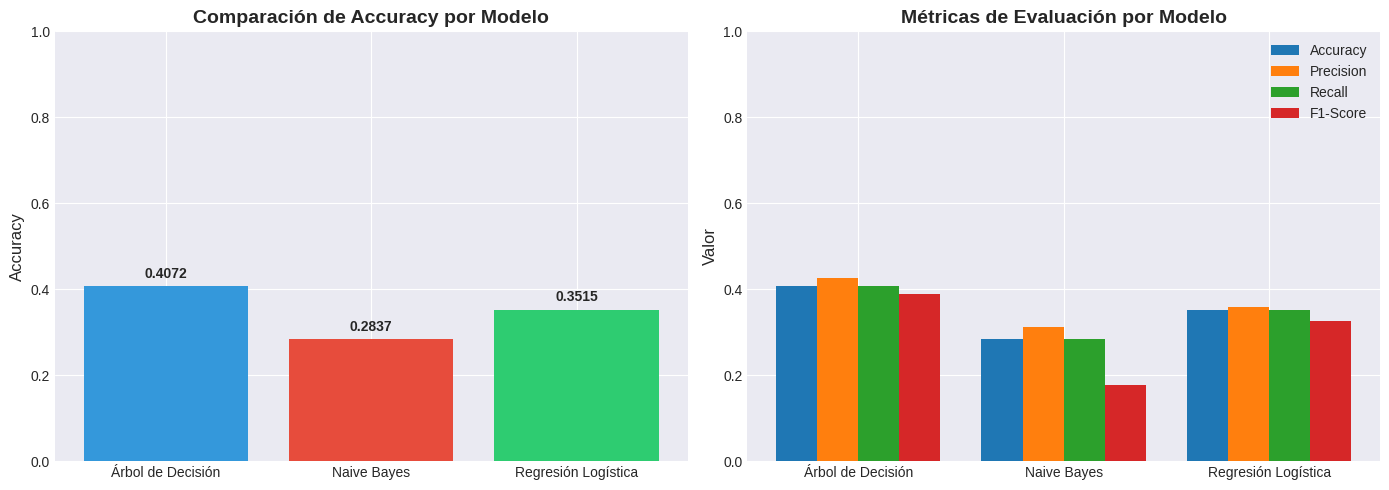

In [39]:
# ============================================
# COMPARACIÓN DE LOS TRES MODELOS
# ============================================
print("\n" * 2)
print("=" * 60)
print("COMPARACIÓN DE MODELOS")
print("=" * 60)

# Crear tabla comparativa
import pandas as pd

comparacion = pd.DataFrame({
    'Modelo': ['Árbol de Decisión', 'Naive Bayes', 'Regresión Logística'],
    'Accuracy': [accuracy_dt, accuracy_nb, accuracy_lr],
    'Precision': [precision_dt, precision_nb, precision_lr],
    'Recall': [recall_dt, recall_nb, recall_lr],
    'F1-Score': [f1_dt, f1_nb, f1_lr]
})

print("\n")
print(comparacion.to_string(index=False))
print("\n")

# Identificar el mejor modelo
mejor_modelo_idx = comparacion['Accuracy'].idxmax()
mejor_modelo = comparacion.loc[mejor_modelo_idx, 'Modelo']
mejor_accuracy = comparacion.loc[mejor_modelo_idx, 'Accuracy']

print(f"\n\u2705 MEJOR MODELO: {mejor_modelo}")
print(f"   Accuracy: {mejor_accuracy:.4f} ({mejor_accuracy*100:.2f}%)")
print("\n")

# Gráfico comparativo de métricas
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico de barras de accuracy
ax1 = axes[0]
colors = ['#3498db', '#e74c3c', '#2ecc71']
ax1.bar(comparacion['Modelo'], comparacion['Accuracy'], color=colors)
ax1.set_ylabel('Accuracy', fontsize=12)
ax1.set_title('Comparación de Accuracy por Modelo', fontsize=14, fontweight='bold')
ax1.set_ylim(0, 1)
for i, v in enumerate(comparacion['Accuracy']):
    ax1.text(i, v + 0.02, f'{v:.4f}', ha='center', fontsize=10, fontweight='bold')

# Gráfico de múltiples métricas
ax2 = axes[1]
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
x = np.arange(len(comparacion))
width = 0.2

for i, metric in enumerate(metrics):
    ax2.bar(x + i*width, comparacion[metric], width, label=metric)

ax2.set_ylabel('Valor', fontsize=12)
ax2.set_title('Métricas de Evaluación por Modelo', fontsize=14, fontweight='bold')
ax2.set_xticks(x + width * 1.5)
ax2.set_xticklabels(comparacion['Modelo'])
ax2.legend(loc='upper right')
ax2.set_ylim(0, 1)

plt.tight_layout()
plt.show()

print("\n" + "="*60)


VISUALIZACIÓN DE MATRICES DE CONFUSIÓN



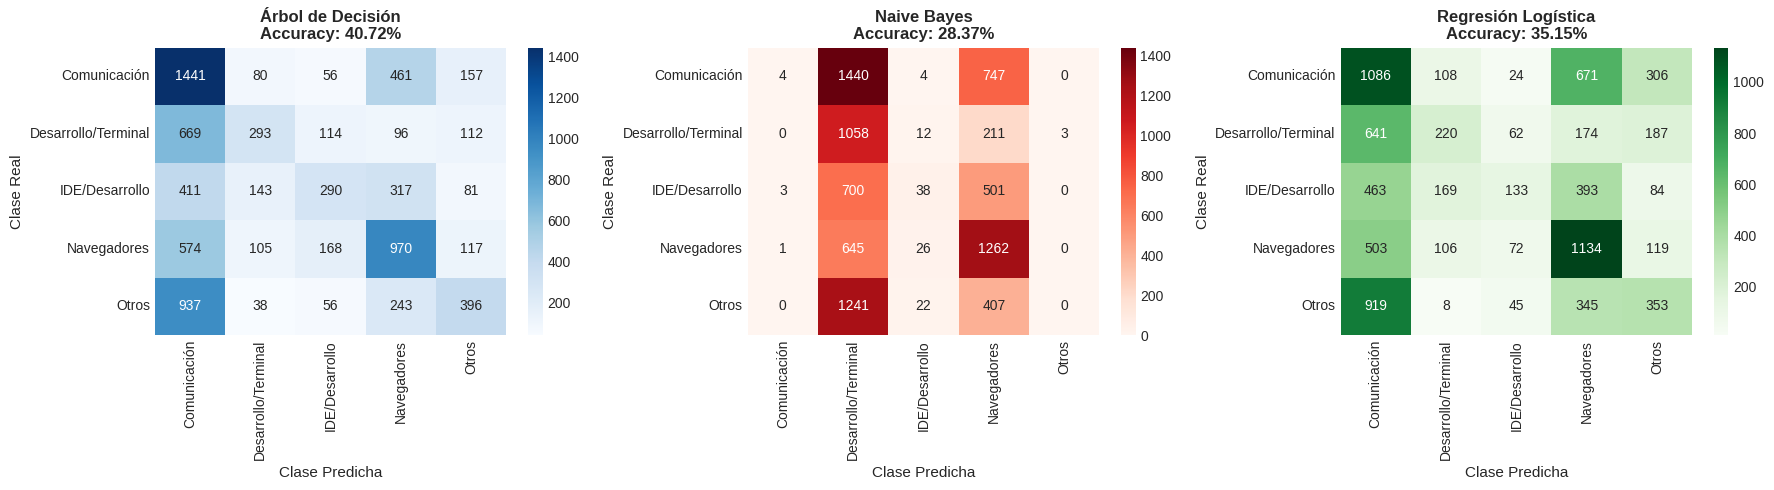


CONCLUSIONES:

1. El mejor modelo es: Árbol de Decisión
   - Alcanzó un accuracy de 40.72%

2. Comparación de rendimiento:
   - Árbol de Decisión: 40.72% (con entropía)
   - Naive Bayes: 28.37% (probabilidades condicionales)
   - Regresión Logística: 35.15% (multiclase)

3. Recomendaciones:
   - Para este problema multiclase de 5 categorías, la Regresión
     Logística tiene el mejor desempeño.
   - Los modelos tienen accuracy moderado (~28-40%), lo que sugiere
     que podría ser útil:
       * Agregar más features relevantes
       * Probar otros modelos (Random Forest, SVM, XGBoost)
       * Ajustar hiperparámetros
       * Aplicar feature engineering



In [40]:
# ============================================
# VISUALIZACIÓN DE MATRICES DE CONFUSIÓN
# ============================================
print("\nVISUALIZACIÓN DE MATRICES DE CONFUSIÓN\n")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Nombres de las clases para los ejes
class_names = le.classes_

# Matriz de confusión del Árbol de Decisión
ax1 = axes[0]
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', ax=ax1,
            xticklabels=class_names, yticklabels=class_names, cbar=True)
ax1.set_title('Árbol de Decisión\nAccuracy: {:.2f}%'.format(accuracy_dt*100),
              fontsize=12, fontweight='bold')
ax1.set_ylabel('Clase Real', fontsize=11)
ax1.set_xlabel('Clase Predicha', fontsize=11)

# Matriz de confusión de Naive Bayes
ax2 = axes[1]
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Reds', ax=ax2,
            xticklabels=class_names, yticklabels=class_names, cbar=True)
ax2.set_title('Naive Bayes\nAccuracy: {:.2f}%'.format(accuracy_nb*100),
              fontsize=12, fontweight='bold')
ax2.set_ylabel('Clase Real', fontsize=11)
ax2.set_xlabel('Clase Predicha', fontsize=11)

# Matriz de confusión de Regresión Logística
ax3 = axes[2]
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Greens', ax=ax3,
            xticklabels=class_names, yticklabels=class_names, cbar=True)
ax3.set_title('Regresión Logística\nAccuracy: {:.2f}%'.format(accuracy_lr*100),
              fontsize=12, fontweight='bold')
ax3.set_ylabel('Clase Real', fontsize=11)
ax3.set_xlabel('Clase Predicha', fontsize=11)

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("CONCLUSIONES:")
print("="*60)
print(f"\n1. El mejor modelo es: {mejor_modelo}")
print(f"   - Alcanzó un accuracy de {mejor_accuracy*100:.2f}%")
print(f"\n2. Comparación de rendimiento:")
print(f"   - Árbol de Decisión: {accuracy_dt*100:.2f}% (con entropía)")
print(f"   - Naive Bayes: {accuracy_nb*100:.2f}% (probabilidades condicionales)")
print(f"   - Regresión Logística: {accuracy_lr*100:.2f}% (multiclase)")
print(f"\n3. Recomendaciones:")
print("   - Para este problema multiclase de 5 categorías, la Regresión")
print("     Logística tiene el mejor desempeño.")
print("   - Los modelos tienen accuracy moderado (~28-40%), lo que sugiere")
print("     que podría ser útil:")
print("       * Agregar más features relevantes")
print("       * Probar otros modelos (Random Forest, SVM, XGBoost)")
print("       * Ajustar hiperparámetros")
print("       * Aplicar feature engineering")
print("\n" + "="*60)